## PROBLEM STATEMENT AND BUSINESS CASE

Design a CNN model with fashion image dataset consisting of 70,000 images divided into 60,000 training and 10,000 testing samples. 
Dataset sample consists of 28 X 28 grayscale images associated with a labeling from 10 different categories.

The 10 classes/categories are as follows
0-Tshirt/top, 1-Trouser, 2-Pullover, 3-Dress, 4-Coat, 5-Sandal, 6-Shirt, 7-Sneaker, 8-Bag, 9-Ankle Boot

Each image is 28 X 28 pixel in height and width, for a total of 784 pixels in total. Each pixel has a single pixel value associated with it,
indicating the darkness or lightness of that pixel, with higher number meaning darker. The pixel value is an integer between 0 and 255.
The dataset is extracted from Large-scale Fashion(Deep Fashion) Database 'http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html'


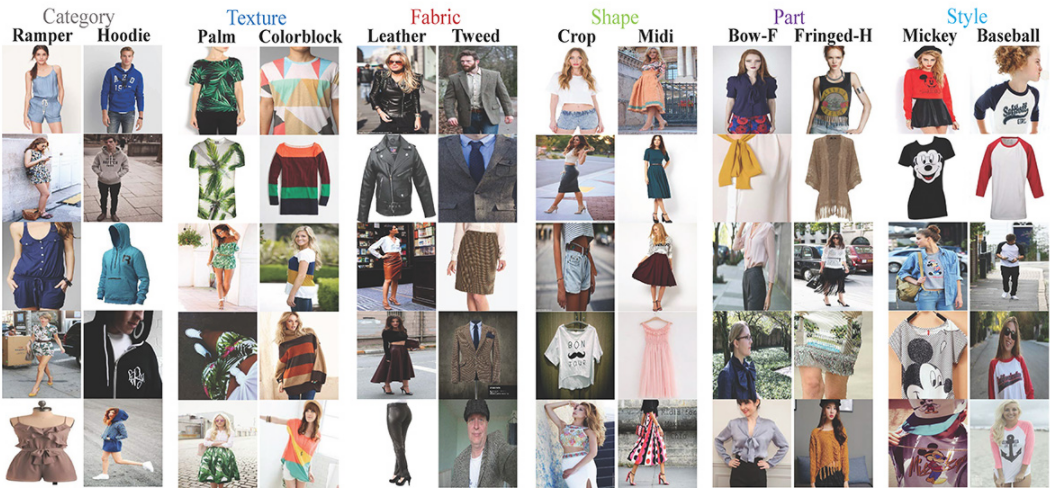

## INSTALL DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## DATA PREPROCESSING

In [2]:
fashion_train_df = pd.read_csv('./fashion_train.csv', sep = ',')
fashion_test_df = pd.read_csv('./fashion_test.csv', sep = ',')
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'bag', 'Ankle boot']

In [3]:
fashion_train_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [36]:
import collections
import plotly.express as px
counter = collections.Counter(fashion_train_df['label'].values)
training_df = pd.DataFrame()
training_df['Categories'] = counter.keys()
training_df['count'] = counter.values()
px.bar(training_df, x='Categories', y='count', color='Categories')

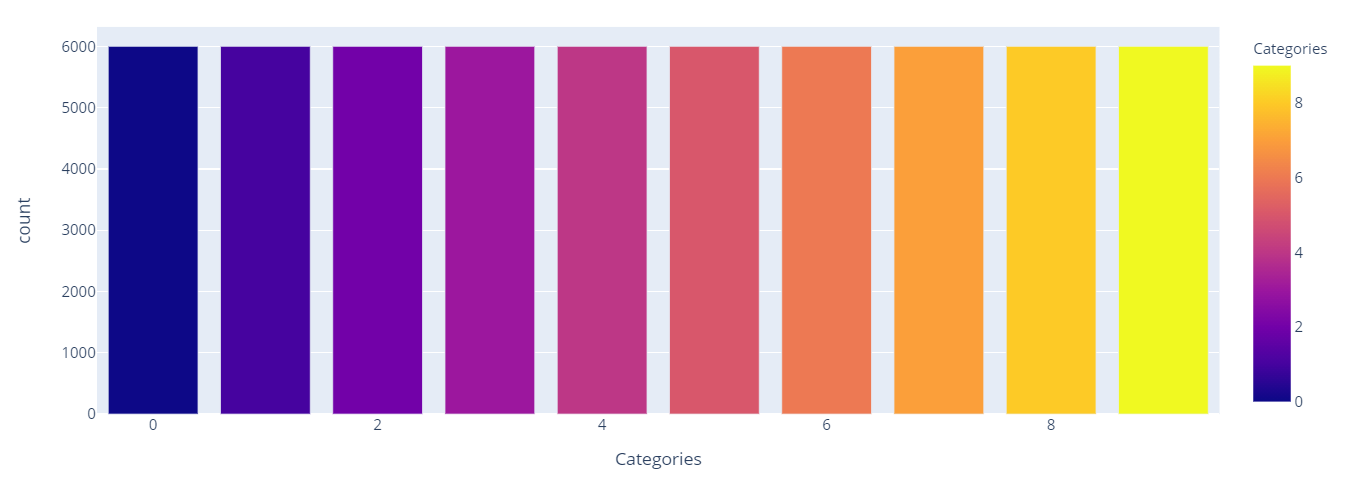

In [5]:
training = np.array(fashion_train_df, dtype='float32')

In [6]:
testing = np.array(fashion_test_df, dtype='float32')

## DATA VISUALIZATION

'bag'

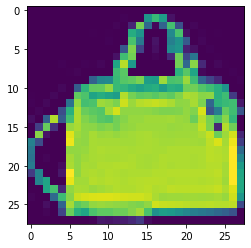

In [7]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
classes[int(label)]

## DISPLAY THE GRAY SCALE VERSION OF THE INPUT DATASET

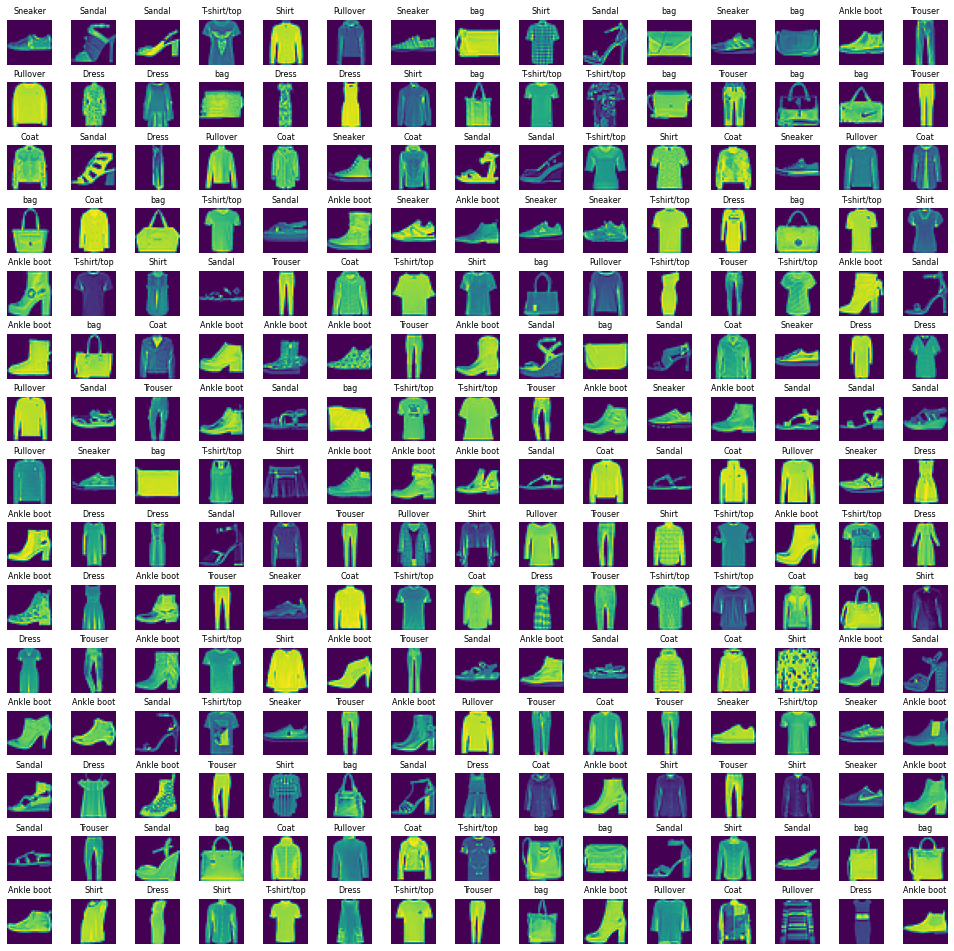

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    title = training[index, 0]
    axes[i].set_title(classes[int(title)], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

## DATA NORMALIZATION/STANDARDIZATION

In [9]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [10]:
x_test = testing[:, 1:]/255
y_test = testing[:, 0]

## TRAIN THE MODEL

In [11]:
from sklearn.model_selection import train_test_split
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator

In [12]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [13]:
# CONVERT THE DATA INTO 28*28 MATRIX FORMAT TO BE ACCESSIBLE BY THE CONVOLUTIONAL NEURAL NETWORK/DEEP NETWORK

x_train = x_train.reshape(x_train.shape[0], *(28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], *(28, 28, 1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28, 28, 1))

## CONVOLUTION

In [14]:
cnn_model = Sequential()

In [15]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28,28,1), activation = 'relu'))

## POOLING(MAX POOLING)

In [16]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

## FLATTENING

In [17]:
cnn_model.add(Flatten())

## MODEL TRAINING AND BACK TRACKING

In [18]:
cnn_model.add(Dense(32, activation='relu'))

In [19]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [20]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [21]:
epochs = 40

In [22]:
cnn_model.fit(x_train, y_train,  batch_size=512, epochs=epochs, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/40
94/94 [==============================] - 1s 11ms/step - loss: 1.8584 - accuracy: 0.4395 - val_loss: 0.7921 - val_accuracy: 0.7236
Epoch 2/40
94/94 [==============================] - 1s 10ms/step - loss: 0.7351 - accuracy: 0.7403 - val_loss: 0.6336 - val_accuracy: 0.7707
Epoch 3/40
94/94 [==============================] - 1s 11ms/step - loss: 0.6058 - accuracy: 0.7818 - val_loss: 0.5672 - val_accuracy: 0.7983
Epoch 4/40
94/94 [==============================] - 1s 11ms/step - loss: 0.5548 - accuracy: 0.8013 - val_loss: 0.5443 - val_accuracy: 0.8064
Epoch 5/40
94/94 [==============================] - 1s 11ms/step - loss: 0.5280 - accuracy: 0.8114 - val_loss: 0.5142 - val_accuracy: 0.8169
Epoch 6/40
94/94 [==============================] - 1s 11ms/step - loss: 0.5016 - accuracy: 0.8207 - val_loss: 0.4929 - val_accuracy: 0.8263
Epoch 7/40
94/94 [==============================] - 1s 14ms/step - loss: 0.4786 - accuracy: 0.8277 - val_loss: 0.4810 - val_accuracy: 0.8262
Epoch 8/40
94

## EVALUATING THE MODEL

In [23]:
evaluation = cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8662


In [24]:
print('Test accuaracy : {:.3f}'.format(evaluation[1]))

Test accuaracy : 0.866


In [25]:
predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)

In [26]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

## DISPLAY THE RESULTS

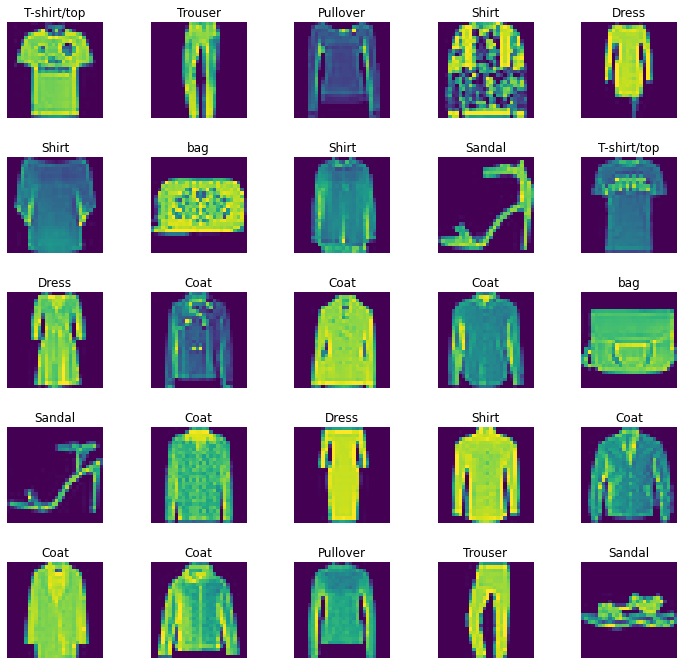

In [27]:
L_grid = 5
W_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, L_grid*W_grid):
    axes[i].imshow(x_test[i].reshape(28,28))
    predicted = classes[int(predicted_classes[i])]
    actual = classes[int(y_test[i])]
    axes[i].set_title(predicted)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## MODEL PERFORMANCE EVALUATION - CONFIDENCE MATRIX

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(predicted_classes, y_test)

<AxesSubplot:>

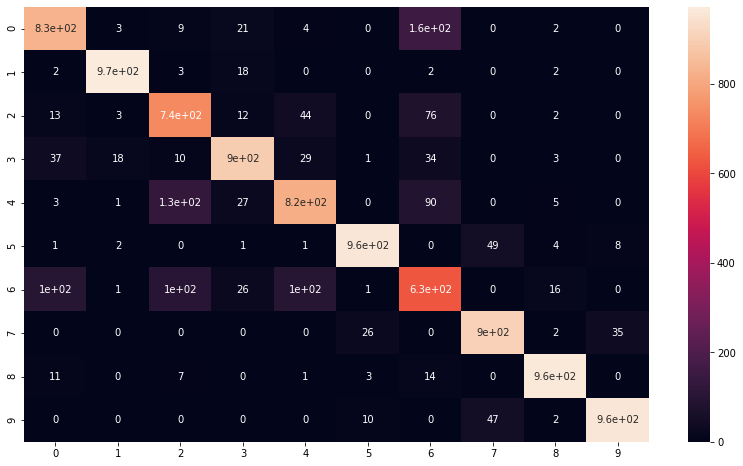

In [38]:
plt.figure(figsize = (14,8))
sns.heatmap(cm, annot = True)

## CLASSIFICATION REPORT

In [31]:
from sklearn.metrics import classification_report

In [32]:
num_classes = 10
target_names = ["class{}".format(i) for i in range(num_classes)]

In [33]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      1000
         1.0       0.97      0.97      0.97      1000
         2.0       0.83      0.74      0.78      1000
         3.0       0.87      0.90      0.88      1000
         4.0       0.76      0.82      0.79      1000
         5.0       0.94      0.96      0.95      1000
         6.0       0.64      0.63      0.63      1000
         7.0       0.93      0.90      0.92      1000
         8.0       0.96      0.96      0.96      1000
         9.0       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## IMPROVING THE MODEL

* Improve accuracy by adding more feature detectors/filters or adding dropout
* Drop out refers to dropping out units in a neural network
* Neurons develop co-dependency amongst each other during training
* Drop out is a regulization technique used for reducing overfitting in neural networks
* It enables training to occur on several architectures of the neural network

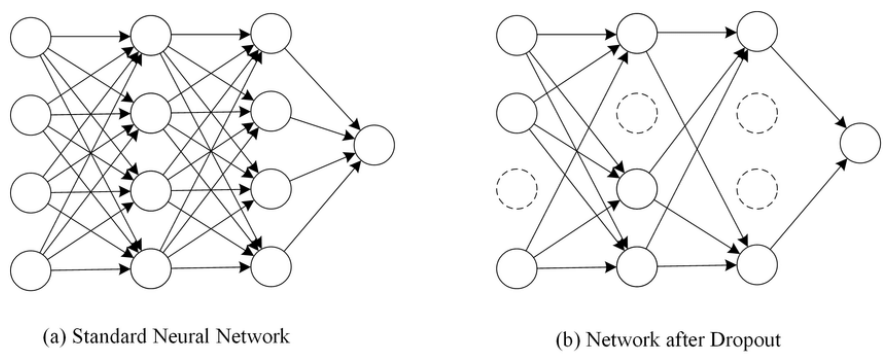

## CONCLUSION AND FUTURE WORK

Advanced techniques using more rich dataset can be used to analyse the color, style, and texture beside the categorical classification.

1.  Classify images based on fashion landmark detection.

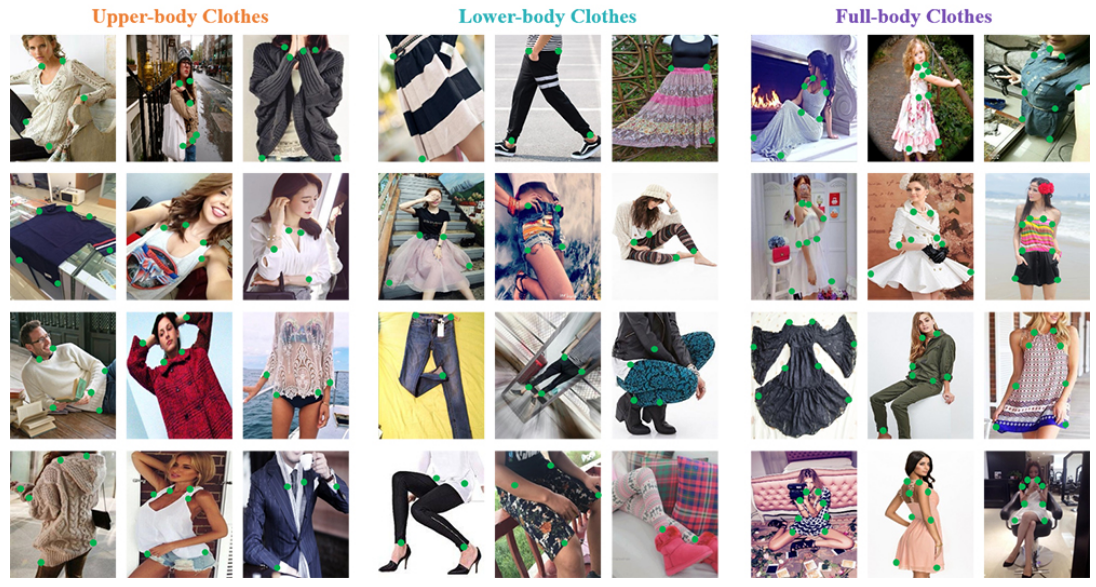

2. Classify images based on clothing type and source type

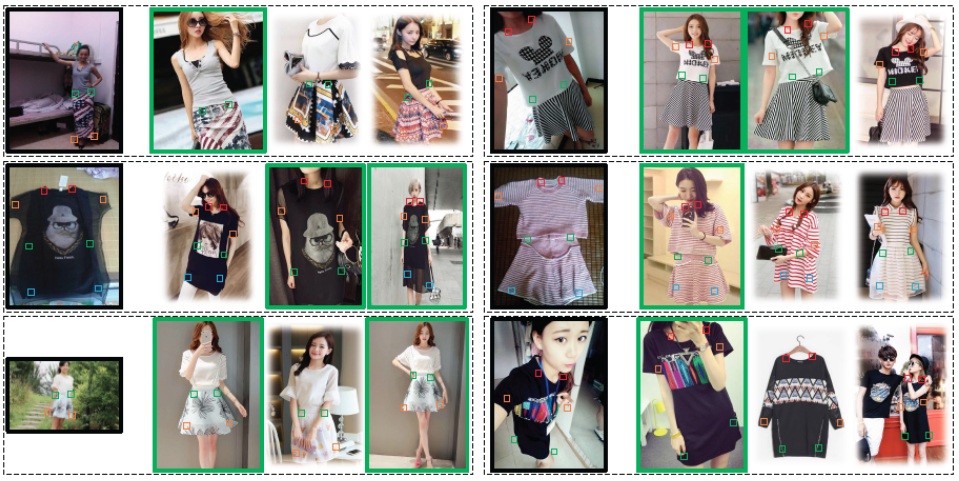

3. Classify images based on clothing type and pose type

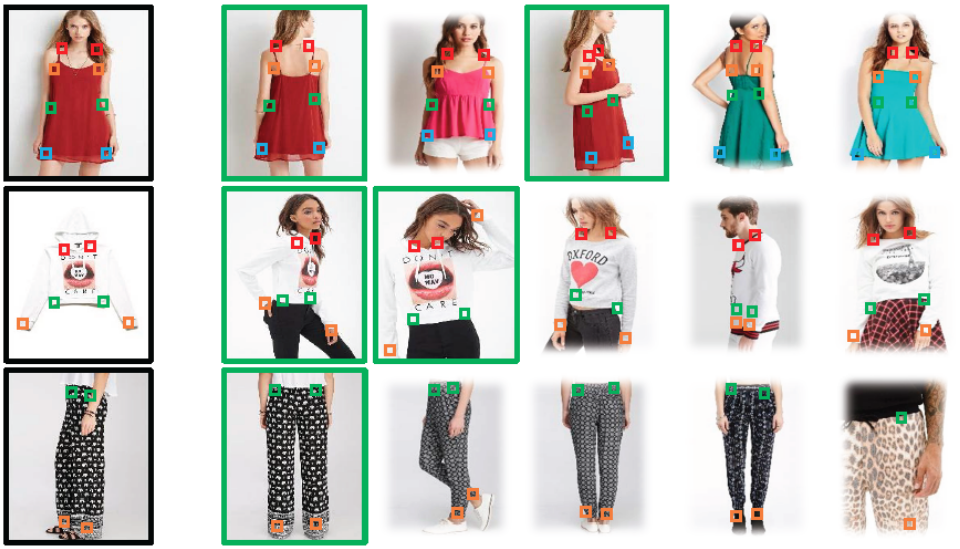